# Housing Pricing Prediction

Suppose you are selling your house and you
want to know what a good market price would be. One way to do this is to
first collect information on recent houses sold and make a model of housing
prices.
The file ex1data2.txt contains a training set of housing prices in Port-
land, Oregon. The first column is the size of the house (in square feet), the
second column is the number of bedrooms, and the third column is the price
of the house.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 

In [2]:
df = pd.read_csv('ex1data2.txt', sep=",", header=None)
df.rename(columns={0: 'size', 1: '# bedrooms', 2: 'price'}, inplace=True)
df.head()

,size,# bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


Note that the house sizes (first colums in X) are about 1000 times the number of bedrooms (second column in X). The feature_normalize() normalizes the input features and set then to zero mean.

In [3]:
def feature_normalize(X):
    return (X - X.mean()) / (X[X.idxmax()] - X[X.idxmin()])

In [4]:
df['normalized_size'] = feature_normalize(df['size'])
df['normalized_rooms'] = feature_normalize(df['# bedrooms'])

In [5]:
df.head()

,size,# bedrooms,price,normalized_size,normalized_rooms
0,2104,3,399900,0.028494,-0.042553
1,1600,3,329900,-0.110502,-0.042553
2,2400,3,369000,0.110127,-0.042553
3,1416,2,232000,-0.161247,-0.292553
4,3000,4,539900,0.275598,0.207447


In [6]:
# Gradient descent settings
iterations = 500
alpha = 0.1
theta = np.zeros(3)
y = np.array(df['price'])
X = df[['normalized_size', 'normalized_rooms']].values
ones = np.ones(len(X)).reshape(len(X), 1)
X = np.hstack((ones, X))

In [7]:
# Compute the square error
def compute_cost(X, y, theta):
    m = len(y)
    diff = X.dot(theta) - y
    J = 1.0 / (2 * m) * diff.T.dot(diff)
    return J

In [8]:
# Gradient Descent Implementation
def gradient_descent_multi(X, y, theta, alpha, num_iters):
    m = len(y)
    J_history = np.zeros(num_iters)

    for i in range(num_iters):
        theta -= alpha / m * ((X.dot(theta) - y).T.dot(X))
        J_history[i] = compute_cost(X, y, theta)

    return theta, J_history


In [9]:
theta, J_history = gradient_descent_multi(X, y, theta, alpha, iterations)

Plot convergence graph:

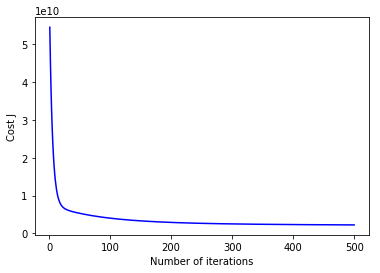

In [10]:
plt.figure()
plt.plot(range(1, iterations + 1), J_history, color='b')
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.show()

Estimate the price of a 1650 sq-ft, 3 br house: 

In [11]:
normalized_size = (1650 - df['size'].mean()) / (df['size'][df['size'].idxmax()] - df['size'][df['size'].idxmin()])

In [12]:
normalized_room =  (3 - df['# bedrooms'].mean()) / (df['# bedrooms'][df['# bedrooms'].idxmax()] - df['# bedrooms'][df['# bedrooms'].idxmin()])

In [13]:
test = np.array([normalized_size, normalized_room])

In [14]:
test = np.hstack((np.ones(1), test))
result = test.dot(theta)
print("For a house of 1650 sq-ft and 3 bed rooms the price would be close to = ", result)

For a house of 1650 sq-ft and 3 bed rooms the price would be close to =  298181.2092099968


### Prediction with scikit learn

In [49]:
linearRegressor = LinearRegression()
lx = np.array(df[['size','# bedrooms']])
ly = np.array(df['price']).reshape(len(df['price']), 1)
linearRegressor.fit(lx, ly)
general_prediction = linearRegressor.predict(lx)
question_prediction = linearRegressor.predict(np.array([[1650, 3]]))
print("For a house of 1650 sq-ft and 3 bed rooms the price would be close to = ", question_prediction[0][0])

For a house of 1650 sq-ft and 3 bed rooms the price would be close to =  293081.4643348961


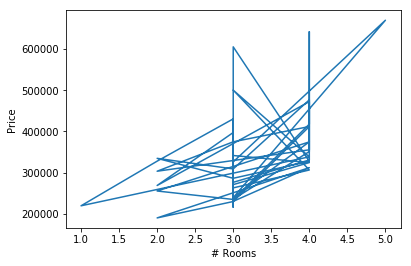

In [58]:
plt.figure()
plt.xlabel('# Rooms')
plt.ylabel('Price')
plt.plot(df['# bedrooms'], general_prediction, label='Linear Regression')
plt.show()

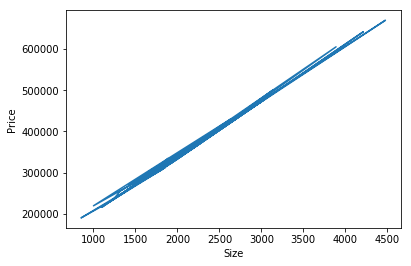

In [56]:
plt.figure()
plt.xlabel('Size')
plt.ylabel('Price')
plt.plot(df['size'], general_prediction, label='Linear Regression')
plt.show()